In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"Real estate.csv")

In [3]:
# Step 2: Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [4]:
print("\n--- First 5 Rows ---")
print(df.head())


--- First 5 Rows ---
   no  x1_transaction_date  x2_house_age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   x3_distance_to_the_nearest_mrt_station  x4_number_of_convenience_stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   x5_latitude  x6_longitude  y_house_price_of_unit_area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24

In [5]:
# Step 3: Check and handle missing values
print("\nMissing Values Before:\n", df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)
print("\nMissing Values After:\n", df.isnull().sum())


Missing Values Before:
 no                                        0
x1_transaction_date                       0
x2_house_age                              0
x3_distance_to_the_nearest_mrt_station    0
x4_number_of_convenience_stores           0
x5_latitude                               0
x6_longitude                              0
y_house_price_of_unit_area                0
dtype: int64

Missing Values After:
 no                                        0
x1_transaction_date                       0
x2_house_age                              0
x3_distance_to_the_nearest_mrt_station    0
x4_number_of_convenience_stores           0
x5_latitude                               0
x6_longitude                              0
y_house_price_of_unit_area                0
dtype: int64


In [6]:
# Step 4: Remove duplicates if any
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\nRemoved {before - after} duplicate rows.")


Removed 0 duplicate rows.


In [7]:
# Step 5: Filter and subset (Example: houses with price > 40)
filtered_df = df[df['y_house_price_of_unit_area'] > 40]
print("\nFiltered houses with price > 40:\n", filtered_df.head())


Filtered houses with price > 40:
    no  x1_transaction_date  x2_house_age  \
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   
6   7             2012.667          34.5   

   x3_distance_to_the_nearest_mrt_station  x4_number_of_convenience_stores  \
1                                306.5947                                9   
2                                561.9845                                5   
3                                561.9845                                5   
4                                390.5684                                5   
6                                623.4731                                7   

   x5_latitude  x6_longitude  y_house_price_of_unit_area  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54

In [8]:
# Step 6: Handle outliers using IQR
print("before removing outliers ", df.shape)
price_col = 'y_house_price_of_unit_area'
Q1 = df[price_col].quantile(0.25)
Q3 = df[price_col].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
df = df[(df[price_col] >= lower) & (df[price_col] <= upper)]
print(f"\nOutliers removed. New shape: {df.shape}")

before removing outliers  (414, 8)

Outliers removed. New shape: (411, 8)


In [9]:
    # Step 7: Feature Engineering (Example: Price per convenience store)
df['price_per_store'] = df['y_house_price_of_unit_area'] / (df['x4_number_of_convenience_stores'] + 1)

In [10]:
# Step 8: Aggregation – Average house price by number of stores
avg_price = df.groupby('x4_number_of_convenience_stores')['y_house_price_of_unit_area'].mean().reset_index()
print("\nAverage Price by Number of Convenience Stores:\n", avg_price)


Average Price by Number of Convenience Stores:
     x4_number_of_convenience_stores  y_house_price_of_unit_area
0                                 0                   26.462687
1                                 1                   29.935556
2                                 2                   31.412500
3                                 3                   29.536957
4                                 4                   37.474194
5                                 5                   44.729851
6                                 6                   46.951351
7                                 7                   43.848387
8                                 8                   44.696667
9                                 9                   49.434783
10                               10                   48.430000


In [11]:
# Step 9: Normalize numeric columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [12]:
# Step 10: Save cleaned dataset
df.to_csv("Cleaned_RealEstate_Prices.csv", index=False)
print("\n✅ Cleaned dataset saved as 'Cleaned_RealEstate_Prices.csv'")


✅ Cleaned dataset saved as 'Cleaned_RealEstate_Prices.csv'


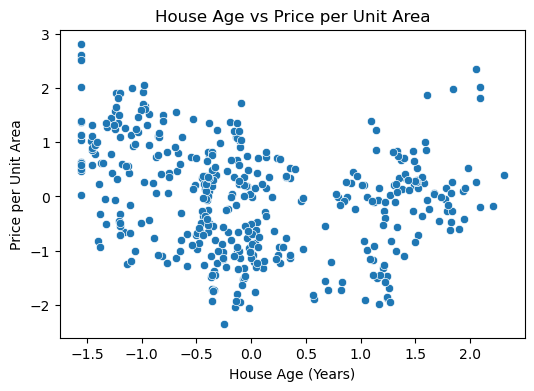

In [25]:
# Step 11: Visualization - Relation between House Age & Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='x2_house_age', y='y_house_price_of_unit_area', data=df)
plt.title("House Age vs Price per Unit Area")
plt.xlabel("House Age (Years)")
plt.ylabel("Price per Unit Area")
plt.show()